In [1]:
import numpy as np
from matplotlib import pyplot as plt
from gwaxion import physics

Imagine we are targeting a specific black hole with initial known mass ($50 M_\odot$) and spin (0.7):

In [2]:
bh = physics.BlackHole(mass=50, chi=0.7, msun=True)

For concreteness, also assume a distance of 5 Mpc:

In [3]:
distance = 5E6 * physics.PC_SI

Let's obtain and plot GW amplitudes and frequencies for a range of $\alpha$'s:

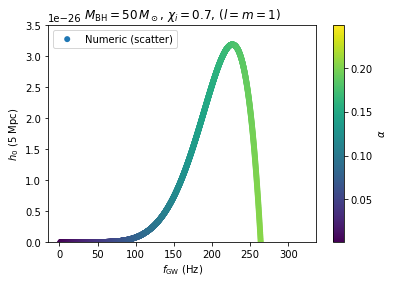

In [4]:
h0rs, fgws, alphas = bh.scan_alphas(alpha_max=0.25, delta_alpha=0.0001)

# h0rs are the amplitudes 1m away from the source, so rescale by actual distance
h0s = h0rs / distance

fig, ax = plt.subplots()
s = ax.scatter(fgws, h0s, c=alphas, edgecolor='none', label='Numeric (scatter)')
cb = plt.colorbar(s, label=r'$\alpha$')
ax.set_ylim(0, max(h0s)*1.1)
ax.set_xlabel(r"$f_{\rm GW}$ (Hz)")
ax.set_ylabel(r"$h_0$ (5 Mpc)")
plt.title(r"$M_{\rm BH}=50\,M_\odot$, $\chi_i=0.7$, $(l=m=1)$")
plt.legend(loc="upper left")
plt.show()

Instead of creating an array of amplitudes, we could have use the internal numerical fit available through the `BlackHole` object:

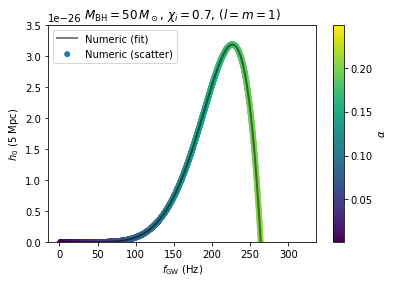

In [5]:
fig, ax = plt.subplots()
s = ax.scatter(fgws, h0s, c=alphas, edgecolor='none', label='Numeric (scatter)')
ax.plot(fgws, bh.h0r_fit(fgws)/distance, lw=2, color='k', alpha=0.5, label="Numeric (fit)")
cb = plt.colorbar(s, label=r'$\alpha$')
ax.set_ylim(0, max(h0s)*1.1)
ax.set_xlabel(r"$f_{\rm GW}$ (Hz)")
ax.set_ylabel(r"$h_0$ (5 Mpc)")
plt.title(r"$M_{\rm BH}=50\,M_\odot$, $\chi_i=0.7$, $(l=m=1)$")
plt.legend(loc="upper left")
plt.show()
plt.show(ax)

We can compare this to the analytic approximation by Arvanitaki et al.:

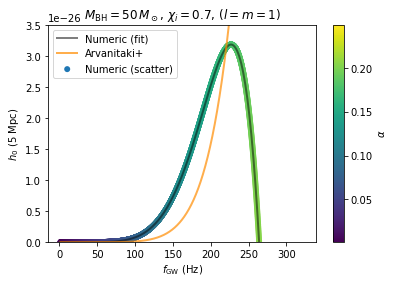

In [6]:
h0r_approx, fgws2 = physics.h0_scalar_approx(alphas, m_bh=bh.mass_msun)

fig, ax = plt.subplots()
s = ax.scatter(fgws, h0s, c=alphas, edgecolor='none', label='Numeric (scatter)')
ax.plot(fgws, bh.h0r_fit(fgws)/distance, lw=2, color='k', alpha=0.5, label="Numeric (fit)")
ax.plot(fgws2, h0r_approx/distance, lw=2, color='darkorange', alpha=0.7, label="Arvanitaki+")
cb = plt.colorbar(s, label=r'$\alpha$')
ax.set_ylim(0, max(h0s)*1.1)
ax.set_xlabel(r"$f_{\rm GW}$ (Hz)")
ax.set_ylabel(r"$h_0$ (5 Mpc)")
plt.legend(loc="upper left")
plt.title(r"$M_{\rm BH}=50\,M_\odot$, $\chi_i=0.7$, $(l=m=1)$")
plt.show(ax)